# Why spatial patterns matter - Real vs Random

Generating visualization showing how the influence of space and how staring at statistics only is not enough

In [2]:
import geopandas as gpd

data = gpd.read_file('http://geo.stat.fi/geoserver/postialue/wfs?request=GetFeature&typename=postialue:pno_tilasto_2019&outputformat=JSON')

In [3]:
data.head()

,id,objectid,posti_alue,nimi,namn,euref_x,euref_y,pinta_ala,vuosi,kunta,...,tp_u_kans,tp_x_tunt,pt_vakiy,pt_tyoll,pt_tyott,pt_0_14,pt_opisk,pt_elakel,pt_muut,geometry
0,pno_tilasto_2019.1,867,00100,Helsinki Keskusta - Etu-Töölö,Helsingfors centrum - Främre Tölö,385114,6672391,2353278,2019,091,...,17.0,1.0,18035.0,10032.0,856.0,1812.0,1198.0,3326.0,811.0,"MULTIPOLYGON (((385653.893 6671591.048, 385573..."
1,pno_tilasto_2019.2,868,00120,Punavuori,Rödbergen,385614,6671378,414010,2019,091,...,0.0,0.0,7055.0,3872.0,336.0,817.0,428.0,1242.0,360.0,"MULTIPOLYGON (((385316.092 6671076.984, 385279..."
2,pno_tilasto_2019.3,869,00130,Kaartinkaupunki,Gardesstaden,386228,6671492,428960,2019,091,...,12.0,0.0,1522.0,839.0,61.0,170.0,104.0,258.0,90.0,"MULTIPOLYGON (((386212.111 6671061.262, 386176..."
3,pno_tilasto_2019.7,873,00170,Kruununhaka,Kronohagen,386475,6672476,713343,2019,091,...,234.0,0.0,7427.0,4099.0,345.0,892.0,507.0,1297.0,287.0,"MULTIPOLYGON (((386488.131 6671737.199, 386396..."
4,pno_tilasto_2019.4,870,00140,Kaivopuisto - Ullanlinna,Brunnsparken - Ulrikasborg,386410,6670742,931841,2019,091,...,1.0,0.0,7934.0,4218.0,325.0,929.0,518.0,1519.0,425.0,"MULTIPOLYGON (((386577.050 6670280.544, 386552..."


In [5]:
data.columns.values

array(['id', 'objectid', 'posti_alue', 'nimi', 'namn', 'euref_x',
       'euref_y', 'pinta_ala', 'vuosi', 'kunta', 'he_vakiy', 'he_naiset',
       'he_miehet', 'he_kika', 'he_0_2', 'he_3_6', 'he_7_12', 'he_13_15',
       'he_16_17', 'he_18_19', 'he_20_24', 'he_25_29', 'he_30_34',
       'he_35_39', 'he_40_44', 'he_45_49', 'he_50_54', 'he_55_59',
       'he_60_64', 'he_65_69', 'he_70_74', 'he_75_79', 'he_80_84',
       'he_85_', 'ko_ika18y', 'ko_perus', 'ko_koul', 'ko_yliop',
       'ko_ammat', 'ko_al_kork', 'ko_yl_kork', 'hr_tuy', 'hr_ktu',
       'hr_mtu', 'hr_pi_tul', 'hr_ke_tul', 'hr_hy_tul', 'hr_ovy',
       'te_taly', 'te_takk', 'te_as_valj', 'te_nuor', 'te_eil_np',
       'te_laps', 'te_plap', 'te_aklap', 'te_klap', 'te_teini', 'te_aik',
       'te_elak', 'te_omis_as', 'te_vuok_as', 'te_muu_as', 'tr_kuty',
       'tr_ktu', 'tr_mtu', 'tr_pi_tul', 'tr_ke_tul', 'tr_hy_tul',
       'tr_ovy', 'ra_ke', 'ra_raky', 'ra_muut', 'ra_asrak', 'ra_asunn',
       'ra_as_kpa', 'ra_pt_as', 'ra_kt

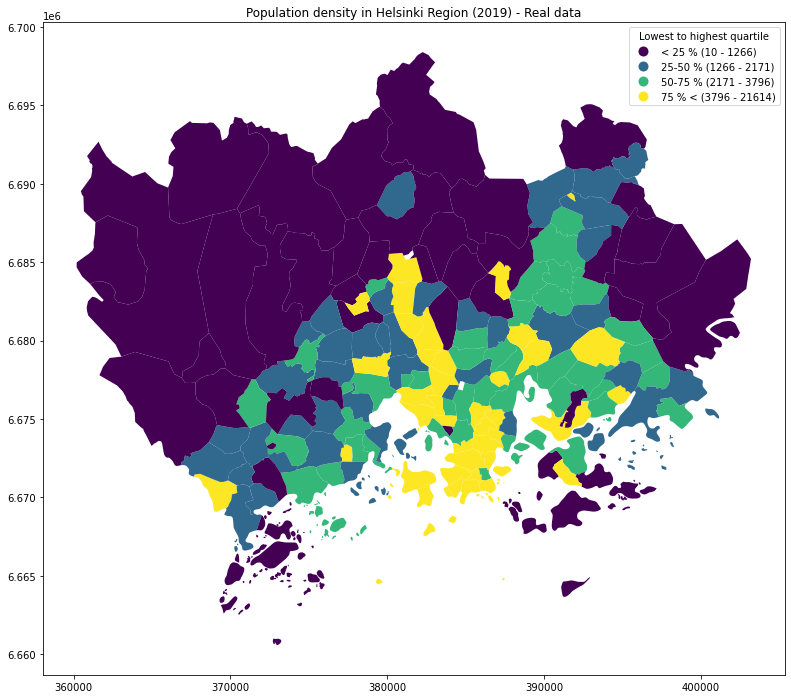

In [300]:
import mapclassify as mc
import matplotlib.pyplot as plt

# Population density - REAL
sel = data.loc[data["kunta"].isin(["091", "049", "092", "235"])].copy()
sel["pop_density"] = (sel["he_vakiy"] / (sel.area / (10**6))).round(0)
ax = sel.plot(column="pop_density", scheme="quantiles", k=4, figsize=(15,12), legend=True)
ax.set_title("Population density in Helsinki Region (2019) - Real data");
leg = ax.get_legend()
txts = leg.get_texts()
labels = ["< 25 %", "25-50 %", "50-75 %", "75 % <"]
for i, txt in enumerate(txts):
    orig_label = txt.get_text().replace("[", "(").replace(" ", "").replace(".00", "").replace(",", " - ").replace("]", ")")
    txt.set_text(labels[i] + " " + orig_label)
leg.set_title("Lowest to highest quartile")

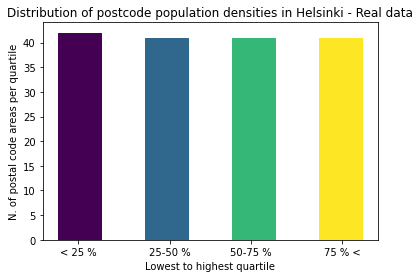

In [297]:
# Create a histogram of the data
import pandas as pd
from bokeh.palettes import Viridis7

# Drop na
hdata = sel.copy()
hdata = hdata.dropna(subset=["pop_density"])

# Find out which quantile each row belongs to
hdata["quantile"] = pd.qcut(hdata["pop_density"].values, q=[0, 0.25, 0.5, 0.75, 1.0])
codes, uniques = pd.factorize(hdata["quantile"], sort=True)

# Create DataFrame
h = pd.DataFrame({"quantile_id": codes})
ax = h["quantile_id"].plot.hist(by="quantile_id", bins=7, figsize=(6,4), title="Distribution of postcode population densities in Helsinki - Real data")
ax.set_xticks([0.2,1.1,1.9, 2.8])
ax.set_xticklabels( ["< 25 %", "25-50 %", "50-75 %", "75 % <"] );

# Match the colors
for i in range(7):
    color = Viridis7[i]
    ax.get_children()[i].set_color(color)
    
# Add labels
ax.set_xlabel("Lowest to highest quartile")
ax.set_ylabel("N. of postal code areas per quartile");

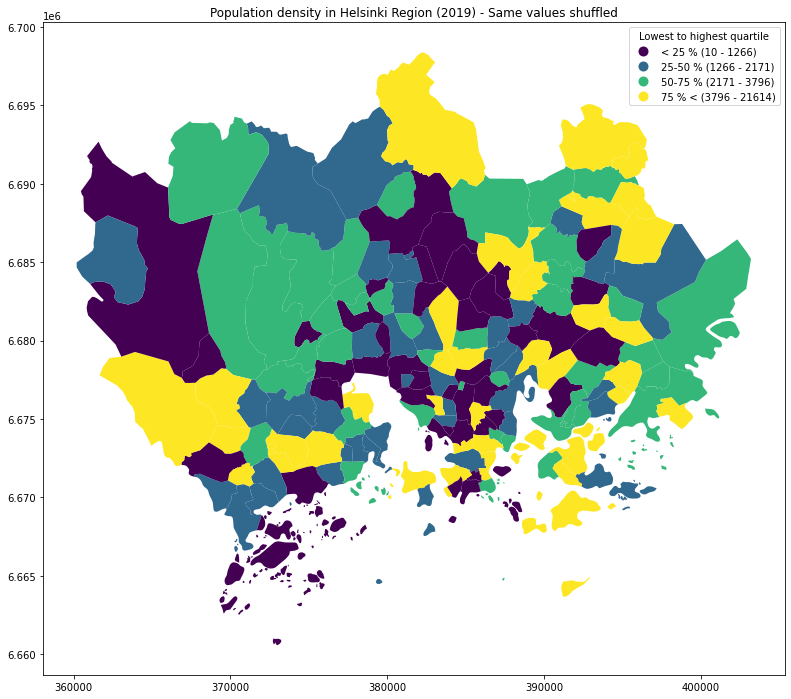

In [143]:
import numpy as np

# Population density - RANDOM
rand = sel.copy()
vals = rand["pop_density"].values
np.random.shuffle(vals)


ax = rand.plot(column="pop_density", scheme="quantiles", k=4, figsize=(15,12), legend=True)
ax.set_title("Population density in Helsinki Region (2019) - Same values shuffled");
leg = ax.get_legend()
txts = leg.get_texts()
labels = ["< 25 %", "25-50 %", "50-75 %", "75 % <"]
for i, txt in enumerate(txts):
    orig_label = txt.get_text().replace("[", "(").replace(" ", "").replace(".00", "").replace(",", " - ").replace("]", ")")
    txt.set_text(labels[i] + " " + orig_label)
leg.set_title("Lowest to highest quartile")

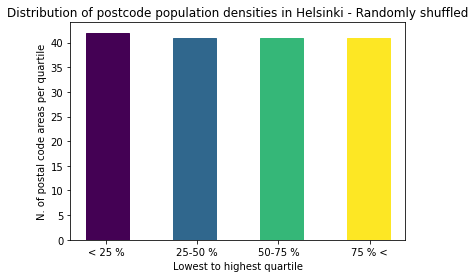

In [298]:
import pandas as pd
from bokeh.palettes import Viridis7

# Drop na
hdata = rand.copy()
hdata = hdata.dropna(subset=["pop_density"])

# Find out which quantile each row belongs to
hdata["quantile"] = pd.qcut(hdata["pop_density"].values, q=[0, 0.25, 0.5, 0.75, 1.0])
codes, uniques = pd.factorize(hdata["quantile"], sort=True)

# Create DataFrame
h = pd.DataFrame({"quantile_id": codes})
ax = h["quantile_id"].plot.hist(by="quantile_id", bins=7, figsize=(6,4), title="Distribution of postcode population densities in Helsinki - Randomly shuffled")
ax.set_xticks([0.2,1.1,1.9, 2.8])
ax.set_xticklabels( ["< 25 %", "25-50 %", "50-75 %", "75 % <"] );

# Match the colors
for i in range(7):
    color = Viridis7[i]
    ax.get_children()[i].set_color(color)
    
# Add labels
ax.set_xlabel("Lowest to highest quartile")
ax.set_ylabel("N. of postal code areas per quartile");